In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats 
import scipy
import seaborn as sns
import matplotlib.pylab as plt
import networkx as nx


sp500_sym = pd.read_csv("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/loans_income.csv")
sp500_px = pd.read_csv("https://github.com/SZapperi/CorsoProbabilitaStatistica/raw/master/data/loan_data.csv.gz")

In [43]:
sp500_px


,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,45338,Fully Paid,8000,36 months,72000,18.97,4.57850,9725,58.2,credit_card,...,1,0,9,4.2,paid off,8,credit_card,RENT,> 1 Year,0.35
45338,45339,Fully Paid,2000,36 months,25200,13.24,3.20333,4925,40.7,wedding,...,0,1,13,4.2,paid off,3,other,MORTGAGE,> 1 Year,0.50
45339,45340,Fully Paid,4375,36 months,20000,7.95,9.98460,6574,73.0,debt_consolidation,...,1,1,8,2.4,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.55
45340,45341,Fully Paid,8000,36 months,48000,26.91,6.45250,10303,32.4,debt_consolidation,...,1,1,10,5.2,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.65


In [44]:
corr=sp500_px.corr()
corr

,Unnamed: 0,loan_amnt,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,emp_length,borrower_score
Unnamed: 0,1.000000,-0.040680,0.070302,-0.080779,-0.111695,-0.012305,-0.114676,0.007608,0.000754,0.020790,0.220469,0.012431,0.235683
loan_amnt,-0.040680,1.000000,0.310525,0.075155,0.522273,0.285700,0.099535,-0.021224,0.064013,0.218488,-0.249466,0.163213,-0.023900
annual_inc,0.070302,0.310525,1.000000,-0.156245,-0.262502,0.259401,0.017311,-0.059216,0.013731,0.155143,-0.020360,0.111836,0.052661
dti,-0.080779,0.075155,-0.156245,1.000000,0.231693,0.159050,0.248429,0.009165,0.027311,0.323559,-0.121441,0.059675,-0.227145
payment_inc_ratio,-0.111695,0.522273,-0.262502,0.231693,1.000000,0.002187,0.114169,0.043040,0.047695,0.009507,-0.186675,-0.007322,-0.103581
revol_bal,-0.012305,0.285700,0.259401,0.159050,0.002187,1.000000,0.207604,0.021926,0.080450,0.227142,-0.051111,0.103722,-0.054003
revol_util,-0.114676,0.099535,0.017311,0.248429,0.114169,0.207604,1.000000,0.042164,0.030781,-0.078182,-0.327684,0.058748,-0.458232
delinq_2yrs_zero,0.007608,-0.021224,-0.059216,0.009165,0.043040,0.021926,0.042164,1.000000,-0.011118,-0.050694,0.113763,-0.038345,-0.007168
pub_rec_zero,0.000754,0.064013,0.013731,0.027311,0.047695,0.080450,0.030781,-0.011118,1.000000,0.000160,0.063611,-0.038563,-0.010810
open_acc,0.020790,0.218488,0.155143,0.323559,0.009507,0.227142,-0.078182,-0.050694,0.000160,1.000000,-0.047083,0.095482,0.036333


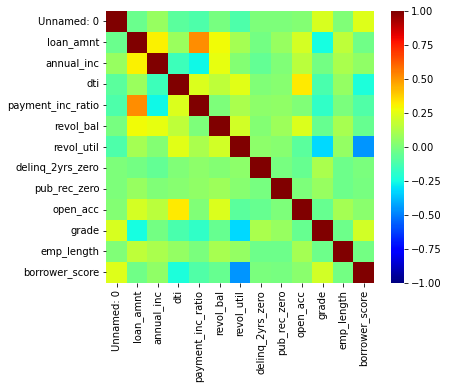

In [45]:
#plot correlation matrix
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.heatmap(corr, vmin=-1, vmax=1, 
                 cmap="jet", #colormap divergente
                 ax=ax)
plt.show()

In [46]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links




,var1,var2,value
0,Unnamed: 0,Unnamed: 0,1.000000
1,Unnamed: 0,loan_amnt,-0.040680
2,Unnamed: 0,annual_inc,0.070302
3,Unnamed: 0,dti,-0.080779
4,Unnamed: 0,payment_inc_ratio,-0.111695
...,...,...,...
164,borrower_score,pub_rec_zero,-0.010810
165,borrower_score,open_acc,0.036333
166,borrower_score,grade,0.207415
167,borrower_score,emp_length,-0.019822


In [70]:
links_filtered=links.loc[ (links['value'] > 0.2) & (links['var1'] != links['var2']) ]
links_filtered
 

,var1,var2,value
10,Unnamed: 0,grade,0.220469
12,Unnamed: 0,borrower_score,0.235683
15,loan_amnt,annual_inc,0.310525
17,loan_amnt,payment_inc_ratio,0.522273
18,loan_amnt,revol_bal,0.285700
22,loan_amnt,open_acc,0.218488
27,annual_inc,loan_amnt,0.310525
31,annual_inc,revol_bal,0.259401
43,dti,payment_inc_ratio,0.231693
45,dti,revol_util,0.248429


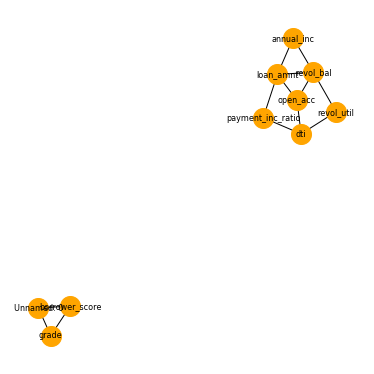

In [72]:
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

fig = plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, 
        node_color='orange', 
        node_size=400, 
        edge_color='black', 
        linewidths=1, font_size=8)

In [73]:
fig = plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, 
        node_color='skyblue', 
        edge_color='white'
        font_color ='white')
fig.set_facecolor("#00000F")

SyntaxError: invalid syntax (1774055632.py, line 5)